In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv", keep_default_na=False,na_values=[''])
train_df.head()

#%%
df_indexes = train_df.columns
null_number = train_df.isnull().sum()
for i in range(len(null_number)):
    if(null_number[i]!=0):
        print(df_indexes[i]+" : "+str(null_number[i]))

Lot Frontage : 253
Mas Vnr Type : 14
Mas Vnr Area : 14
Bsmt Exposure : 2
Electrical : 1
Bsmt Full Bath : 1
Bsmt Half Bath : 1
Garage Yr Blt : 89
Garage Finish : 1
Garage Cars : 1
Garage Area : 1
Garage Qual : 1
Garage Cond : 1


In [2]:
#%% Transform LotFrontage (252 nan) --- Linear feet of street connected to property
# taking average
lf=train_df['Lot Frontage']
# count nan numbers first
print('nan numebr BEFORE transformation:',lf.isnull().sum())
fill_value_lf=lf.mean()
lf=lf.fillna(fill_value_lf)
# after scaling, check nan value number again
print('nan numebr AFTER transformation:',lf.isnull().sum())

nan numebr BEFORE transformation: 253
nan numebr AFTER transformation: 0


In [3]:
#%% Transform Mas Vnr Type : 14  MasVnrType: Masonry veneer type
# choosing the mode, as there are 840 none, and 8 nan
MVT=train_df['Mas Vnr Type']
print('nan numebr BEFORE transformation:',MVT.isnull().sum())
fill_value_MVT="None"
MVT=MVT.fillna(fill_value_MVT)
# after scaling, check nan value number again
print('nan numebr AFTER transformation:',MVT.isnull().sum())

nan numebr BEFORE transformation: 14
nan numebr AFTER transformation: 0


In [4]:
#%% Mas Vnr Area : 14  -- Masonry veneer area in square feet
# choosing mean
MVA=train_df['Mas Vnr Area']
print('nan numebr BEFORE transformation:',MVA.isnull().sum())
fill_value_MVA=MVA.mean()
MVA=MVA.fillna(fill_value_MVA)
print('nan number AFTER transformation:', MVA.isnull().sum())

nan numebr BEFORE transformation: 14
nan number AFTER transformation: 0


In [5]:
#%% Garage Yr Blt : 89 --Year garage was built
# choosing mean
GYB=train_df['Garage Yr Blt']
print('nan numebr BEFORE transformation:',GYB.isnull().sum())
fill_value_GYB=GYB.mean()
GYB=GYB.fillna(fill_value_GYB)
print('nan number AFTER transformation:', GYB.isnull().sum())

nan numebr BEFORE transformation: 89
nan number AFTER transformation: 0


In [6]:
#%% Bsmt Exposure : 2 
# choosing mode
BE=train_df['Bsmt Exposure']
print('nan numebr BEFORE transformation:',BE.isnull().sum())
BE.value_counts()
fill_value_BE='No'
BE=BE.fillna(fill_value_BE)
print('nan number AFTER transformation:', BE.isnull().sum())


nan numebr BEFORE transformation: 2
nan number AFTER transformation: 0


In [7]:
#%% drop the rest nan value and the first column 'Train_ID'
preprocessed_train_df=train_df.copy()
preprocessed_train_df['Lot Frontage']=lf
preprocessed_train_df['Mas Vnr Type']=MVT
preprocessed_train_df['Mas Vnr Area']=MVA
preprocessed_train_df['Garage Yr Blt']=GYB
preprocessed_train_df['Bsmt Exposure']=BE
preprocessed_train_df=preprocessed_train_df.dropna(how='any')
preprocessed_train_df=preprocessed_train_df.drop(['Train_ID'], axis=1)
print(preprocessed_train_df.shape)

(1395, 80)


In [8]:
#%% EDA
# check correlation
corr=preprocessed_train_df.corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.matshow(preprocessed_train_df.corr())
plt.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 480x480 with 1 Axes>

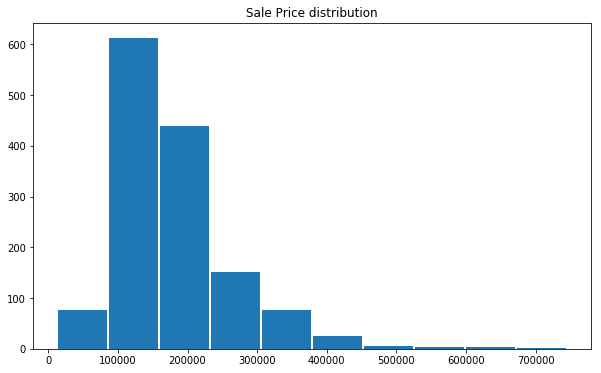

In [9]:
# check target distribution
y_train=preprocessed_train_df['SalePrice']
plt.figure(figsize=(10,6))
plt.hist(y_train,rwidth=0.95)
plt.title('Sale Price distribution')
plt.show()

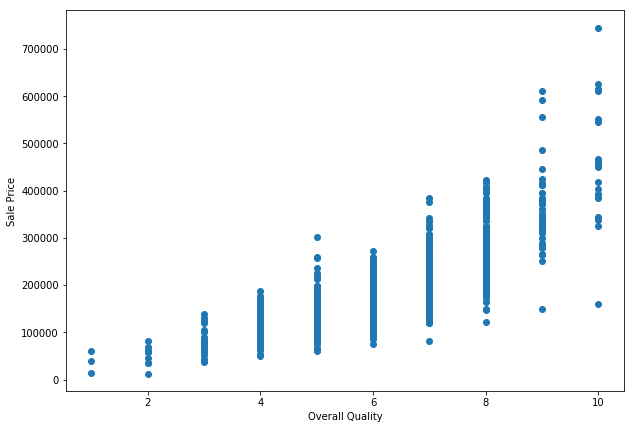

In [10]:
# check relationship between Overall Qual and SalePrice, corr=0.8018
OQ=preprocessed_train_df['Overall Qual']
plt.figure(figsize=(10,7))
plt.scatter(OQ,y_train)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

Text(0, 0.5, 'Sale Price')

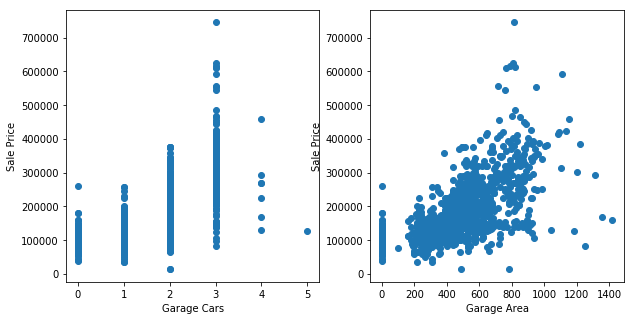

In [11]:
# check relationship between garage cars/garage area with saleprice corr=0.64/0.63
GC=preprocessed_train_df['Garage Cars']
GA=preprocessed_train_df['Garage Area']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(GC,y_train)
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')
plt.subplot(1,2,2)
plt.scatter(GA,y_train)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

In [12]:
#%% Ordinal data transform ———————— ALL transformation start at 1

preprocessed_train_df['Exter Qual'].value_counts()
preprocessed_train_df['Exter Qual'] = preprocessed_train_df['Exter Qual'].map({ 
                     "Fa":0, "TA":1, "Gd":2, "Ex":3})

In [13]:
preprocessed_train_df['Exter Cond'].value_counts()
preprocessed_train_df['Exter Cond'] = preprocessed_train_df['Exter Cond'].map({ 
                     "Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

In [14]:
preprocessed_train_df['Bsmt Qual'].value_counts()
preprocessed_train_df['Bsmt Qual'] = preprocessed_train_df['Bsmt Qual'].map({ 
                     "NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

In [15]:
preprocessed_train_df['Bsmt Exposure'].value_counts()
preprocessed_train_df['Bsmt Exposure'] = preprocessed_train_df['Bsmt Exposure'].map({ 
                     "NA":0, "No":1, "Mn":2, "Av":3, "Gd":4})

In [16]:
preprocessed_train_df['Bsmt Cond'].value_counts()
preprocessed_train_df['Bsmt Cond'] = preprocessed_train_df['Bsmt Cond'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})

In [17]:
preprocessed_train_df['BsmtFin Type 1'].value_counts()
preprocessed_train_df['BsmtFin Type 1'] = preprocessed_train_df['BsmtFin Type 1'].map({ 
                     "NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4,"ALQ":5,"GLQ":6})

In [18]:
preprocessed_train_df['BsmtFin Type 2'].value_counts()
preprocessed_train_df['BsmtFin Type 2'] = preprocessed_train_df['BsmtFin Type 2'].map({ 
                     "NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4,"ALQ":5,"GLQ":6})
preprocessed_train_df['BsmtFin Type 2'].value_counts()

1    1195
3      55
2      42
0      37
4      28
5      24
6      14
Name: BsmtFin Type 2, dtype: int64

In [19]:
preprocessed_train_df['Pool QC'].value_counts()
preprocessed_train_df['Pool QC'] = preprocessed_train_df['Pool QC'].map({ 
                     "NA":0, "TA":1, "Gd":2, "Ex":3})
preprocessed_train_df['Pool QC'].value_counts()

0    1388
3       3
2       2
1       2
Name: Pool QC, dtype: int64

In [20]:
preprocessed_train_df['Fence'].value_counts()
preprocessed_train_df['Fence'] = preprocessed_train_df['Fence'].map({ 
                     "NA":0, "MnWw":1, "GdWo":2, "MnPrv":3,"GdPrv":4})
preprocessed_train_df['Fence'].value_counts()

0    1120
3     157
4      58
2      53
1       7
Name: Fence, dtype: int64

In [21]:
preprocessed_train_df['Kitchen Qual'].value_counts()
preprocessed_train_df['Kitchen Qual'] = preprocessed_train_df['Kitchen Qual'].map({ 
                     "Fa":0, "TA":1, "Gd":2, "Ex":3})
preprocessed_train_df['Kitchen Qual'].value_counts()

1    708
2    544
3    101
0     42
Name: Kitchen Qual, dtype: int64

In [22]:
preprocessed_train_df['Fireplace Qu'].value_counts()
preprocessed_train_df['Fireplace Qu'] = preprocessed_train_df['Fireplace Qu'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})
preprocessed_train_df['Fireplace Qu'].value_counts()

0.0    684
4.0    338
3.0    287
2.0     41
5.0     22
Name: Fireplace Qu, dtype: int64

In [23]:
preprocessed_train_df['Garage Qual'].value_counts()
preprocessed_train_df['Garage Qual'] = preprocessed_train_df['Garage Qual'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})
preprocessed_train_df['Garage Qual'].value_counts()

3.0    1233
0.0      88
2.0      56
4.0      14
5.0       2
Name: Garage Qual, dtype: int64

In [24]:
preprocessed_train_df['Garage Cond'].value_counts()
preprocessed_train_df['Garage Cond'] = preprocessed_train_df['Garage Cond'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})
preprocessed_train_df['Garage Cond'].value_counts()

3.0    1254
0.0      88
2.0      38
4.0       7
5.0       3
Name: Garage Cond, dtype: int64

In [25]:
preprocessed_train_df['Heating QC'].value_counts()
preprocessed_train_df['Heating QC'] = preprocessed_train_df['Heating QC'].map({ 
                     "Po":0, "Fa":1, "TA":2, "Gd":3,"Ex":4})
preprocessed_train_df['Heating QC'].value_counts()

4    713
2    422
3    212
1     45
0      3
Name: Heating QC, dtype: int64

In [26]:
preprocessed_train_df['Garage Finish'].value_counts()
preprocessed_train_df['Garage Finish'] = preprocessed_train_df['Garage Finish'].map({ 
                     "NA":0, "Unf":1, "RFn":2, "Fin":3})
preprocessed_train_df['Garage Finish'].value_counts()

1    567
2    383
3    357
0     88
Name: Garage Finish, dtype: int64

In [27]:
#%% Import test data
test_df = pd.read_csv("test.csv", keep_default_na=False,na_values=[''])
test_df.head()

Test_ID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0        1           90        RH          82.0      6270   Pave    NA   
1        2           30        RL          85.0     10625   Pave    NA   
2        3           20        RL         129.0     16770   Pave    NA   
3        4           30        RM          60.0     10800   Pave  Grvl   
4        5           60        RL           NaN     29959   Pave    NA   

  Lot Shape Land Contour Utilities  ... Screen Porch Pool Area Pool QC Fence  \
0       Reg          HLS    AllPub  ...            0         0      NA    NA   
1       Reg          Lvl    AllPub  ...            0         0      NA    NA   
2       Reg          Lvl    AllPub  ...            0         0      NA    NA   
3       Reg          Lvl    AllPub  ...            0         0      NA    NA   
4       IR2          Lvl    AllPub  ...            0         0      NA    NA   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  
0           NA        0       8     2007        WD           Normal  
1         Shed      400       5     2010        COD         Abnorml  
2           NA        0       9     2009        WD           Normal  
3         Shed      450       8     2007        WD           Normal  
4           NA        0       1     2009        WD           Normal  

[5 rows x 80 columns]

In [28]:
df_indexes = test_df.columns
null_number = test_df.isnull().sum()
for i in range(len(null_number)):
    if(null_number[i]!=0):
        print(df_indexes[i]+" : "+str(null_number[i]))

Lot Frontage : 217
Mas Vnr Type : 8
Mas Vnr Area : 8
Bsmt Qual : 1
Bsmt Cond : 1
Bsmt Exposure : 2
BsmtFin Type 1 : 1
BsmtFin SF 1 : 1
BsmtFin Type 2 : 2
BsmtFin SF 2 : 1
Bsmt Unf SF : 1
Total Bsmt SF : 1
Bsmt Full Bath : 1
Bsmt Half Bath : 1
Garage Yr Blt : 65
Garage Finish : 1


In [29]:
#%% Transform LotFrontage (252 nan) --- Linear feet of street connected to property
# taking TRAIN average
lf_test=train_df['Lot Frontage']
# count nan numbers first
print('nan numebr BEFORE transformation:',lf_test.isnull().sum())
# fill_value_lf is the filling value we took in training sample
lf_test=lf_test.fillna(fill_value_lf)
# after scaling, check nan value number again
print('nan numebr AFTER transformation:',lf_test.isnull().sum())

nan numebr BEFORE transformation: 253
nan numebr AFTER transformation: 0


In [30]:
#%%
# transform Mas Vnr Type
MVT_test=train_df['Mas Vnr Type']
print('nan numebr BEFORE transformation:',MVT_test.isnull().sum())
MVT_test=MVT_test.fillna(fill_value_MVT)
print('nan numebr AFTER transformation:',MVT_test.isnull().sum())

nan numebr BEFORE transformation: 14
nan numebr AFTER transformation: 0


In [31]:
#%%
MVA_test=train_df['Mas Vnr Area']
print('nan numebr BEFORE transformation:',MVA_test.isnull().sum())
MVA_test=MVA_test.fillna(fill_value_MVA)
print('nan numebr AFTER transformation:',MVA_test.isnull().sum())

nan numebr BEFORE transformation: 14
nan numebr AFTER transformation: 0


In [32]:
#%%
BE_test=train_df['Bsmt Exposure']
print('nan numebr BEFORE transformation:',BE_test.isnull().sum())
BE_test=BE_test.fillna(fill_value_BE)
print('nan numebr AFTER transformation:',BE_test.isnull().sum())


nan numebr BEFORE transformation: 2
nan numebr AFTER transformation: 0


In [33]:
#%%
GYB_test=train_df['Garage Yr Blt']
print('nan numebr BEFORE transformation:',GYB_test.isnull().sum())
GYB_test=GYB_test.fillna(fill_value_GYB)
print('nan numebr AFTER transformation:',GYB_test.isnull().sum())

nan numebr BEFORE transformation: 89
nan numebr AFTER transformation: 0


In [34]:
#%%
train_df['Bsmt Qual'].value_counts()
BQ_test=test_df['Bsmt Qual']
BQ_test=BQ_test.fillna('TA')
print('nan numebr AFTER transformation:',BQ_test.isnull().sum())

nan numebr AFTER transformation: 0


In [35]:
#%%
train_df['Bsmt Cond'].value_counts()
BC_test=test_df['Bsmt Cond']
BC_test=BC_test.fillna('TA')
print('nan numebr AFTER transformation:',BC_test.isnull().sum())

nan numebr AFTER transformation: 0


In [36]:
#%% BsmtFin Type 1
train_df['BsmtFin Type 1'].value_counts()
BT1_test=test_df['BsmtFin Type 1']
BT1_test=BT1_test.fillna('GLQ')
print('nan numebr AFTER transformation:',BT1_test.isnull().sum())

nan numebr AFTER transformation: 0


In [37]:
#%% BsmtFin Type 2
train_df['BsmtFin Type 2'].value_counts()
BT2_test=test_df['BsmtFin Type 1']
BT2_test=BT2_test.fillna('Unf')
print('nan numebr AFTER transformation:',BT2_test.isnull().sum())

nan numebr AFTER transformation: 0


In [38]:
#%% Total Bsmt SF
fill_value_BSF=round(train_df['Total Bsmt SF'].mean())
BSF_test=test_df['Total Bsmt SF']
BSF_test=BSF_test.fillna(fill_value_BSF)
print('nan numebr AFTER transformation:',BSF_test.isnull().sum())

nan numebr AFTER transformation: 0


In [39]:
#%% BsmtFin SF 1
fill_value_BFSF1=round(train_df['BsmtFin SF 1'].mean())
BFSF1_test=test_df['BsmtFin SF 1']
BFSF1_test=BFSF1_test.fillna(fill_value_BFSF1)
print('nan numebr AFTER transformation:',BFSF1_test.isnull().sum())

nan numebr AFTER transformation: 0


In [40]:
#%% BsmtFin SF 2 
fill_value_BFSF2=round(train_df['BsmtFin SF 2'].mean())
BFSF2_test=test_df['BsmtFin SF 2']
BFSF2_test=BFSF2_test.fillna(fill_value_BFSF2)
print('nan numebr AFTER transformation:',BFSF2_test.isnull().sum())

nan numebr AFTER transformation: 0


In [41]:
#%% Bsmt Unf SF
fill_value_BUSF=round(train_df['Bsmt Unf SF'].mean())
BUSF_test=test_df['Bsmt Unf SF']
BUSF_test=BUSF_test.fillna(fill_value_BUSF)
print('nan numebr AFTER transformation:',BUSF_test.isnull().sum())

nan numebr AFTER transformation: 0


In [42]:
#%% Bsmt Full Bath 
BFB_test=test_df['Bsmt Full Bath']
BFB_test=BFB_test.fillna(0.0)
print('nan numebr AFTER transformation:',BFB_test.isnull().sum())

nan numebr AFTER transformation: 0


In [43]:
#%% Bsmt Half Bath
BHB_test=test_df['Bsmt Half Bath']
BHB_test=BHB_test.fillna(0.0)
print('nan numebr AFTER transformation:',BHB_test.isnull().sum())

nan numebr AFTER transformation: 0


In [44]:
#%% Garage Finish
fill_value_GF="Unf"
GF_test=test_df['Garage Finish']
GF_test=GF_test.fillna(fill_value_GF)
print('nan numebr AFTER transformation:',GF_test.isnull().sum())

nan numebr AFTER transformation: 0


In [45]:
#%% replace all processed data into original test set
preprocessed_test_df=test_df.copy()
preprocessed_test_df['Lot Frontage']=lf_test
preprocessed_test_df['Mas Vnr Type']=MVT_test
preprocessed_test_df['Mas Vnr Area']=MVA_test
preprocessed_test_df['Garage Yr Blt']=GYB_test
preprocessed_test_df['Bsmt Exposure']=BE_test
preprocessed_test_df['Bsmt Qual']=BQ_test
preprocessed_test_df['Bsmt Cond']=BC_test
preprocessed_test_df['BsmtFin Type 1']= BT1_test
preprocessed_test_df['BsmtFin SF 1']=BFSF1_test
preprocessed_test_df['BsmtFin Type 2']=BT2_test
preprocessed_test_df['BsmtFin SF 2']=BFSF2_test
preprocessed_test_df['Bsmt Unf SF']=BUSF_test
preprocessed_test_df['Total Bsmt SF']=BSF_test
preprocessed_test_df['Bsmt Full Bath']=BFB_test
preprocessed_test_df['Bsmt Half Bath']=BHB_test
preprocessed_test_df['Garage Finish']=GF_test
preprocessed_test_df=preprocessed_test_df.drop(['Test_ID'], axis=1)
print(preprocessed_test_df.shape)

(1382, 79)


In [46]:
#%% Ordinal data transform ———————— ALL transformation start at 1

preprocessed_test_df['Exter Qual'].value_counts()
preprocessed_test_df['Exter Qual'] = preprocessed_test_df['Exter Qual'].map({ 
                     "Fa":0, "TA":1, "Gd":2, "Ex":3})

preprocessed_test_df['Exter Cond'].value_counts()
preprocessed_test_df['Exter Cond'] = preprocessed_train_df['Exter Cond'].map({ 
                     "Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

preprocessed_test_df['Bsmt Qual'].value_counts()
preprocessed_test_df['Bsmt Qual'] = preprocessed_test_df['Bsmt Qual'].map({ 
                     "NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

preprocessed_test_df['Bsmt Exposure'].value_counts()
preprocessed_test_df['Bsmt Exposure'] = preprocessed_test_df['Bsmt Exposure'].map({ 
                     "NA":0, "No":1, "Mn":2, "Av":3, "Gd":4})

preprocessed_test_df['Bsmt Cond'].value_counts()
preprocessed_test_df['Bsmt Cond'] = preprocessed_test_df['Bsmt Cond'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})

preprocessed_test_df['BsmtFin Type 1'].value_counts()
preprocessed_test_df['BsmtFin Type 1'] = preprocessed_test_df['BsmtFin Type 1'].map({ 
                     "NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4,"ALQ":5,"GLQ":6})

preprocessed_test_df['BsmtFin Type 2'].value_counts()
preprocessed_test_df['BsmtFin Type 2'] = preprocessed_test_df['BsmtFin Type 2'].map({ 
                     "NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4,"ALQ":5,"GLQ":6})
preprocessed_test_df['BsmtFin Type 2'].value_counts()

preprocessed_test_df['Pool QC'].value_counts()
preprocessed_test_df['Pool QC'] = preprocessed_test_df['Pool QC'].map({ 
                     "NA":0, "TA":1, "Gd":2, "Ex":3})
preprocessed_test_df['Pool QC'].value_counts()

preprocessed_test_df['Fence'].value_counts()
preprocessed_test_df['Fence'] = preprocessed_test_df['Fence'].map({ 
                     "NA":0, "MnWw":1, "GdWo":2, "MnPrv":3,"GdPrv":4})
preprocessed_test_df['Fence'].value_counts()

preprocessed_test_df['Kitchen Qual'].value_counts()
preprocessed_test_df['Kitchen Qual'] = preprocessed_test_df['Kitchen Qual'].map({ 
                     "Fa":0, "TA":1, "Gd":2, "Ex":3})
preprocessed_test_df['Kitchen Qual'].value_counts()

preprocessed_test_df['Fireplace Qu'].value_counts()
preprocessed_test_df['Fireplace Qu'] = preprocessed_test_df['Fireplace Qu'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})
preprocessed_test_df['Fireplace Qu'].value_counts()

preprocessed_test_df['Garage Qual'].value_counts()
preprocessed_test_df['Garage Qual'] = preprocessed_test_df['Garage Qual'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})
preprocessed_test_df['Garage Qual'].value_counts()

preprocessed_test_df['Garage Cond'].value_counts()
preprocessed_test_df['Garage Cond'] = preprocessed_test_df['Garage Cond'].map({ 
                     "NA":0, "No":1, "Fa":2, "TA":3, "Gd":4,"Ex":5})
preprocessed_test_df['Garage Cond'].value_counts()

preprocessed_test_df['Heating QC'].value_counts()
preprocessed_test_df['Heating QC'] = preprocessed_test_df['Heating QC'].map({ 
                     "Po":0, "Fa":1, "TA":2, "Gd":3,"Ex":4})
preprocessed_test_df['Heating QC'].value_counts()

preprocessed_test_df['Garage Finish'].value_counts()
preprocessed_test_df['Garage Finish'] = preprocessed_test_df['Garage Finish'].map({ 
                     "NA":0, "Unf":1, "RFn":2, "Fin":3})
preprocessed_test_df['Garage Finish'].value_counts()

1    589
2    388
3    341
0     64
Name: Garage Finish, dtype: int64

In [47]:
# save preprocess data into two new csv files
preprocessed_train_df.to_csv('new_train.csv')
preprocessed_test_df.to_csv('new_test.csv')

# 第二次从这里开始run

In [48]:
# import new data set
new_train=pd.read_csv('new_train.csv')
new_test=pd.read_csv('new_test.csv')

# transforma all data into dummy variables
train_dummy_ready=new_train.iloc[:,1:-1]
y = new_train.iloc[:,-1].values
test_dummy_ready=new_test

In [49]:
from sklearn.feature_extraction import DictVectorizer
dict_vec = DictVectorizer()
X_train_dummy= dict_vec.fit_transform(train_dummy_ready.to_dict(orient='records')).toarray()
X_test_dummy=dict_vec.transform(test_dummy_ready.to_dict(orient='records')).toarray()

In [78]:
pd.DataFrame(new_train)



Unnamed: 0  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0              0           80       RL      76.000000      9880   Pave   NaN   
1              1           20        RL     68.622707     21000   Pave   NaN   
2              2           60        RL    313.000000     63887   Pave   NaN   
3              3           20        FV    100.000000     11824   Pave   NaN   
4              4           20        RL     72.000000     10011   Pave   NaN   
5              5           20        RL     70.000000      7420   Pave   NaN   
6              6           20        FV     75.000000      9000   Pave   NaN   
7              7           20        RL    129.000000     16737   Pave   NaN   
8              8           50        RM     68.622707     10320   Pave  Grvl   
9              9           80        RL     80.000000      9600   Pave   NaN   
10            10           20        RL     67.000000      8308   Pave   NaN   
11            11           30        RL     50.000000      9340   Pave   NaN   
12            12           60        RL     58.000000      9487   Pave   NaN   
13            13           70        RL     80.000000     16560   Pave   NaN   
14            14           50        RM     68.622707      7758   Pave   NaN   
15            15           20        RL     68.622707     12155   Pave   NaN   
16            16           60        RL     98.000000     12328   Pave   NaN   
17            17           60        RL     80.000000     10400   Pave   NaN   
18            18           45        RL     55.000000      5500   Pave   NaN   
19            19           75        RM     53.000000      5350   Pave   NaN   
20            20           50        RM     60.000000      8520   Pave  Grvl   
21            21           60        RL     68.622707      9765   Pave   NaN   
22            22           30        RM     56.000000      3153   Pave  Grvl   
23            23          190        RH     68.622707      7082   Pave   NaN   
24            24           20        RL     65.000000     11479   Pave   NaN   
25            25           80        RL     62.000000      7692   Pave   NaN   
26            26          120        RL     34.000000      3903   Pave   NaN   
27            27           60        RL    105.000000     15578   Pave   NaN   
28            28           20        RL     62.000000     70761   Pave   NaN   
29            29           20        RL     63.000000     12680   Pave   NaN   
...          ...          ...       ...           ...       ...    ...   ...   
1365        1368          160        RL     24.000000      2308   Pave   NaN   
1366        1369           60        RL     80.000000     10421   Pave   NaN   
1367        1370           20        RL     80.000000     10389   Pave   NaN   
1368        1371           50        RM     51.000000      6120   Pave   NaN   
1369        1372          120        RM     44.000000      3842   Pave   NaN   
1370        1373           60        RL    110.000000     13688   Pave   NaN   
1371        1374           20        RL     90.000000      9900   Pave   NaN   
1372        1375           20        RL     70.000000      9100   Pave   NaN   
1373        1376           70        RM     68.622707      5700   Pave   NaN   
1374        1377           30        RM     68.000000      9656   Pave   NaN   
1375        1378           20        RL     68.622707     10708   Pave   NaN   
1376        1379           20        RL     68.622707     20781   Pave   NaN   
1377        1380           70        RM     57.000000      9639   Pave   NaN   
1378        1381           20        RL     70.000000      7931   Pave   NaN   
1379        1382           50        RM    100.000000     12665   Pave  Grvl   
1380        1383          190        RL     60.000000     10800   Pave   NaN   
1381        1384           30        RM     60.000000      9786   Pave   NaN   
1382        1385           20        RL     68.622707     11423   Pave   NaN   
1383  

In [50]:
# the X train set is    X_train_dummy
# the X teset set is    X_test_dummy
# the y train set is    y

In [51]:
wordlist=dict_vec.get_feature_names()
wordlist

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Alley=Grvl',
 'Alley=Pave',
 'Bedroom AbvGr',
 'Bldg Type=1Fam',
 'Bldg Type=2fmCon',
 'Bldg Type=Duplex',
 'Bldg Type=Twnhs',
 'Bldg Type=TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air=N',
 'Central Air=Y',
 'Condition 1=Artery',
 'Condition 1=Feedr',
 'Condition 1=Norm',
 'Condition 1=PosA',
 'Condition 1=PosN',
 'Condition 1=RRAe',
 'Condition 1=RRAn',
 'Condition 1=RRNe',
 'Condition 1=RRNn',
 'Condition 2=Artery',
 'Condition 2=Feedr',
 'Condition 2=Norm',
 'Condition 2=PosA',
 'Condition 2=PosN',
 'Condition 2=RRNn',
 'Electrical=FuseA',
 'Electrical=FuseF',
 'Electrical=FuseP',
 'Electrical=SBrkr',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st=AsbShng',
 'Exterior 1st=AsphShn',
 'Exterior 1st=BrkComm',
 'Exterior 1st=BrkFace',
 'Exterior 1st=CBlock',
 'Exterio

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
print(X_train_dummy)



[[1118.    0.    0. ... 1977. 1977. 2008.]
 [2259.    0.    0. ... 1953. 1953. 2007.]
 [4692.  950.    0. ... 2008. 2008. 2008.]
 ...
 [ 480.    0.    0. ... 1949. 1950. 2006.]
 [ 934.    0.    0. ... 1964. 1964. 2006.]
 [1440.    0.    0. ... 1981. 1981. 2007.]]


In [54]:
print(y)

[171000 217000 160000 ...  35311 132000 182900]


In [56]:
x_train11, x_test11, y_train11, y_test11 = train_test_split(X_train_dummy, y,test_size=0.2,random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train11)
X_test = sc_X.fit_transform(x_test11)

y_train = y_train11
y_test = y_test11



In [73]:
X_train.tolist()


[[1.0257039577644398,
  -0.7693048661352091,
  -0.1091046099739362,
  nan,
  -0.21657404091210666,
  -0.1574591643244444,
  -1.0281645873635095,
  -2.2579549720350083,
  -0.1280368799328964,
  -0.1851783199908252,
  -0.19029371814209955,
  3.396958322190114,
  0.1410170968091197,
  -0.5660882198099703,
  1.1074762826082292,
  -0.26851118226418796,
  0.578730955151787,
  -0.5698107516378247,
  1.392513428032059,
  -0.287121241918627,
  1.1900122086436289,
  -0.2839697333924784,
  -0.29077156834234613,
  0.2907715683423463,
  -0.21199957600127392,
  -0.22767935519973367,
  0.40010393660043253,
  -0.08497185773241703,
  -0.11271279531923445,
  -0.09016696346674262,
  -0.11672179831391663,
  -0.029947637411773982,
  -0.05997601439040702,
  0.0,
  -0.051917413165116374,
  0.08497185773241701,
  -0.05997601439040686,
  -0.029947637411773424,
  0.0,
  -0.2722310064733017,
  -0.15444484779096548,
  -0.05997601439040687,
  0.32564641820963836,
  -0.3799447564111991,
  -0.2178834564912107,
  1.0

In [61]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
alpha_range = 10.**np.arange(-2,3)
lascv = LassoCV(normalize=True,alphas=alpha_range,cv = 5)
lascv.fit(x_train11, y_train11)
preds_lassocv = lascv.predict(x_test11)
print("LASSO RMSE: {0}".format(np.sqrt(mean_squared_error(y_test11, preds_lassocv))))
print("LASSO Lambda: {0}".format(lascv.alpha_))
print("R_2: {0}".format(r2_score(y_test11,preds_lassocv)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(dummies_train)
X_test = sc_X.fit_transform(dummies_test)

y_train = NBA_train["SALARY"]
y_test = NBA_test_target["SALARY"]



In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#model 1  lasso
alpha_range = 10.**np.arange(-2,3)
lascv = LassoCV(normalize=True,alphas=alpha_range,cv = 5)
lascv.fit(X_train, y_train)
preds_lassocv = lascv.predict(X_test)
print("LASSO RMSE: {0}".format(np.sqrt(mean_squared_error(y_test, preds_lassocv))))
print("LASSO Lambda: {0}".format(lascv.alpha_))
print("R_2: {0}".format(r2_score(y_test,preds_lassocv)))